In [4]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Load in your data
data = pd.read_csv('/Users/sriskandhakandimalla/Documents/PSYCH119/LumositySample_user30222.csv')
t = data.gameplay
obsy = data.score

display(data)

,gameplay,score,session,gameplay_withinsession,timestamp,dayselapsed
0,1,35.0,1,1,22-Sep-2015 22:02:00,0.000000
1,2,43.0,1,2,22-Sep-2015 22:03:12,0.000833
2,3,NaN,1,3,22-Sep-2015 22:04:24,0.001667
3,4,38.0,2,1,27-Sep-2015 14:38:56,4.692315
4,5,46.0,2,2,27-Sep-2015 14:40:08,4.693148
5,6,47.0,3,1,01-Oct-2015 18:56:04,8.870880
6,7,48.0,3,2,01-Oct-2015 18:57:14,8.871690
7,8,42.0,4,1,13-Oct-2015 00:01:37,20.083067
8,9,50.0,4,2,13-Oct-2015 00:02:44,20.083843
9,10,51.0,4,3,13-Oct-2015 00:03:50,20.084606


In [8]:
# Remove rows with missing 'score' values
cleaned_data_user_30222 = data.dropna(subset=['score'])
cleaned_data_user_30222.head()


,gameplay,score,session,gameplay_withinsession,timestamp,dayselapsed
0,1,35.0,1,1,22-Sep-2015 22:02:00,0.000000
1,2,43.0,1,2,22-Sep-2015 22:03:12,0.000833
3,4,38.0,2,1,27-Sep-2015 14:38:56,4.692315
4,5,46.0,2,2,27-Sep-2015 14:40:08,4.693148
5,6,47.0,3,1,01-Oct-2015 18:56:04,8.870880


In [10]:
def expmodel(c, a, u, t):
    """
    Function that defines the exponential model so we can reuse it easily later.

    Returns predicted y based on the parameters and gameplay #.
    """
    # Predicted scores
    predy = a - (a - u) * np.exp(-c * t)
    return predy


def calcmse(params, t, obsy):
    """
    Function that computes the predicted performance of the exponential model at times t given parameters c, a, and u.

    Returns the mean squared error (mse) for the predicted and observed scores.
    """
    # Parameters
    c = params[0]  # assume that the 1st parameter is c
    a = params[1]  # assume that the 2nd parameter is a
    u = params[2]  # assume that the 3rd parameter is u

    # Predicted scores
    predy = expmodel(c, a, u, t)  # predicted scores

    # Mean squared deviations between predicted and observed scores
    #   This is what we want to minimize
    mse = np.mean((predy - obsy)**2)

    return mse

In [11]:
# Initialize parameters for the optimization procedure
p0 = np.zeros(3)
p0[0] = 0.01  # initial guess for parameter c
p0[1] = max(cleaned_data_user_30222['score'])  # initial guess for parameter a
p0[2] = min(cleaned_data_user_30222['score'])  # initial guess for parameter u

In [12]:
# Extract gameplay and score values for fitting
t = cleaned_data_user_30222['gameplay'].values
obsy = cleaned_data_user_30222['score'].values

In [13]:
# Fit the model to the data
result = minimize(calcmse, p0, args=(t, obsy))
best_params = result.x
mse = result.fun
c, a, u = best_params

In [14]:
# Predict the scores using the best-fitting parameters
predy = expmodel(c, a, u, t)

<function matplotlib.pyplot.show(close=None, block=None)>

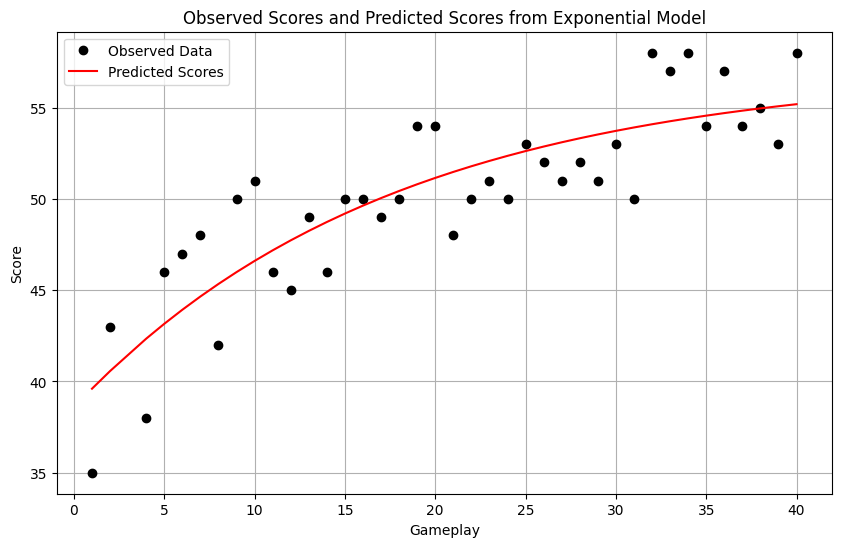

In [15]:
# Plot the observed data and predicted scores
plt.figure(figsize=(10, 6))
plt.plot(t, obsy, 'ko', label='Observed Data')
plt.plot(t, predy, 'r-', label='Predicted Scores')
plt.xlabel('Gameplay')
plt.ylabel('Score')
plt.title('Observed Scores and Predicted Scores from Exponential Model')
plt.legend()
plt.grid(True)
plt.show